## Chapter One 

### 1.1 Least Squares Data Fitting 

Supposr that is a model, the relationship between two variables $b$ and $t$ are governed by a **quadratic function**(二次函数): 

<center>$b(t) = x_1 + x_2t + x_3t^2$</center>

We need to use some experimental experimental data $(t_1,b_1),(t_2,b_2),\dots,(t_m,b_m)$ to determine$x_1,x_2$ and $x_3$.  

If m = 3, and:  
$$
    \left\{ 
        \begin{aligned}
            (t_1, b_1) = (2, 1) \\
            (t_2, b_2) = (3, 6) \\
            (t_3, t_3) = (5, 4) 
        \end{aligned}
    \right.
$$
then: 
$$
    \begin{bmatrix} 
        1 & 2 & 4 \\ 1 & 3 & 9 \\ 2 & 5 & 25 
     \end{bmatrix}
     \times 
     \begin{bmatrix}
         x_1 \\ 
         x_2 \\ 
         x_3 
     \end{bmatrix}
     =
     \begin{bmatrix}
         1 \\
         6 \\
         4 
      \end{bmatrix}
$$

Solving the above linear equation gives, we can use **`R`** 

In [1]:
M_1 = matrix(c(1,1,1,2,3,5,4,9,25),nrow = 3)
M_2 = matrix(c(1,6,4))

In [2]:
print(M_1)
print(M_2)
solve(M_1,M_2)

     [,1] [,2] [,3]
[1,]    1    2    4
[2,]    1    3    9
[3,]    1    5   25
     [,1]
[1,]    1
[2,]    6
[3,]    4


-21
15
-2


We can get $(x_1, x_2, x_3)^T = (-21, 15, -2)$  \\
so that $b(t) = -21 + 15t -2t^2$. \\
It is common that we collect **more data points than the number of variables in the model**. And it is expected that each of the measurements will be in error. 

For example, if we also have $(t_4, b_4) = (7,-15)$, and if we use the above $b(t)$, then: $b(7) = -21 + 15*7 - 2*7^2 = -14 \neq -15$. 

Since each data point may have some error, we must use them **"collectively"**(共同地).

Define the **residual vector**： 
$$
    r = b-Ax = 
    \begin{bmatrix}
        b_1 - (x_1 + x_2t_1 + x_3t_1^2) \\
        b_2 - (x_1 + x_2t_2 + x_3t_2^2) \\
        . \\
        . \\
        . \\
        b_m - (x_1 + x_2t_m + x_3t_m^2) 
     \end{bmatrix}
$$ 
where 
$$
    r = 
    \begin{bmatrix}
        r_1 \\
        . \\
        . \\
        . \\
        r_m 
     \end{bmatrix}
     \text{ and  } 
     A = 
     \begin{bmatrix}
        1 & t_1 & t_1^2  \\
        . \\
        . \\
        . \\
        1 & t_m & t_m^2 
     \end{bmatrix}
$$ 
and make $r$ **as small as possible**. As $r$ is a vector, we specify the request of making $r$ small as **letting some norm of $r$ small**.  

Now, we can use `R` code to try to make the model:  

In [7]:
xvalues <- c(2,3,5,7)
yvalues <- c(1,6,4,-15)

png(file = "nls.png")

plot(xvalues, yvalues)

model <- nls(yvalues ~ b1 * xvalues^2 + b2 * xvalues, start = list(b1 = 1, b2 = 1))

new.data <- data.frame(xvalues = seq(min(xvalues),max(xvalues),len = 100))
lines(new.data$xvalues,predict(model,newdata = new.data))

dev.off()

print(sum(resid(model)^2))

print(confint(model))

pdf 
  2

[1] 41.02868


Waiting for profiling to be done...


        2.5%      97.5%
b1 -2.265969  0.3930825
b2 -3.298662 12.6327087


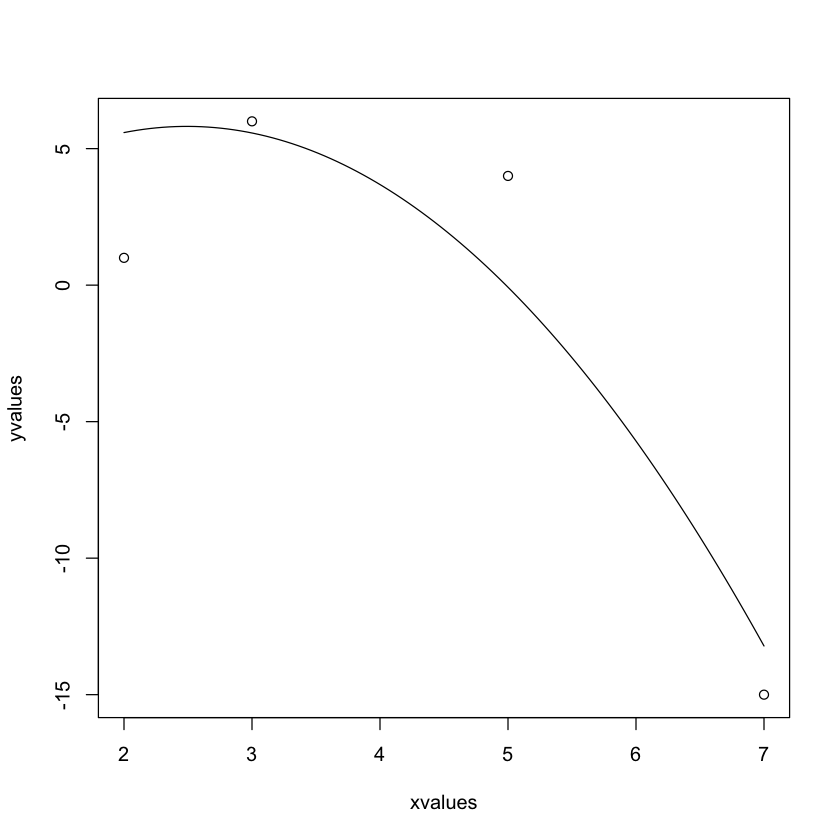

In [5]:
plot(xvalues, yvalues)
new.data <- data.frame(xvalues = seq(min(xvalues),max(xvalues),len = 100))
lines(new.data$xvalues,predict(model,newdata = new.data))